In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as ny

In [191]:
df=pd.read_csv("rolling_stones_spotify.csv")

In [192]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,6/10/2022,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,6/10/2022,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,6/10/2022,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,6/10/2022,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,6/10/2022,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [194]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


# a.	Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [195]:
#Consider a song is popular if popularity is greater than 40
aggregated = df.groupby("album").agg(
    Total_popular=("popularity", lambda x: x[x >= 40].sum()),  
    Mean_Popular=("popularity", lambda x: x[x >= 40].mean()),                     
    Count_Popular=("popularity", lambda x: x[x >= 40].count()),   
    Total=("popularity", "sum"),  
    Mean=("popularity", "mean"),                     
    Count=("popularity", "count")        
)
aggregated

,Total_popular,Mean_Popular,Count_Popular,Total,Mean,Count
album,,,,,,
12 X 5,88,44.000000,2,385,32.083333,12
12 x 5,0,NaN,0,60,5.000000,12
A Bigger Bang (2009 Re-Mastered),86,43.000000,2,433,27.062500,16
A Bigger Bang (Live),0,NaN,0,400,18.181818,22
Aftermath,188,62.666667,3,474,43.090909,11
...,...,...,...,...,...,...
Undercover,0,NaN,0,180,18.000000,10
Undercover (2009 Re-Mastered),42,42.000000,1,251,25.100000,10
Voodoo Lounge (Remastered 2009),139,46.333333,3,510,34.000000,15


In [196]:
# If 70% of total songs in album is popular then recomend
aggregated['Percentage_Popular'] = aggregated['Count_Popular'] / aggregated['Count'] * 100

In [197]:
# Sort by Percentage_Popular in descending order
aggregated = aggregated.sort_values(by=["Total_popular","Percentage_Popular"], ascending=False)
album_popular_counts=aggregated[aggregated["Percentage_Popular"]>50]
album_popular_counts.head(3)

,Total_popular,Mean_Popular,Count_Popular,Total,Mean,Count,Percentage_Popular
album,,,,,,,
Exile On Main Street (2010 Re-Mastered),647,46.214286,14,795,44.166667,18,77.777778
Sticky Fingers (Remastered),533,53.300000,10,533,53.300000,10,100.000000
Some Girls,405,50.625000,8,481,48.100000,10,80.000000


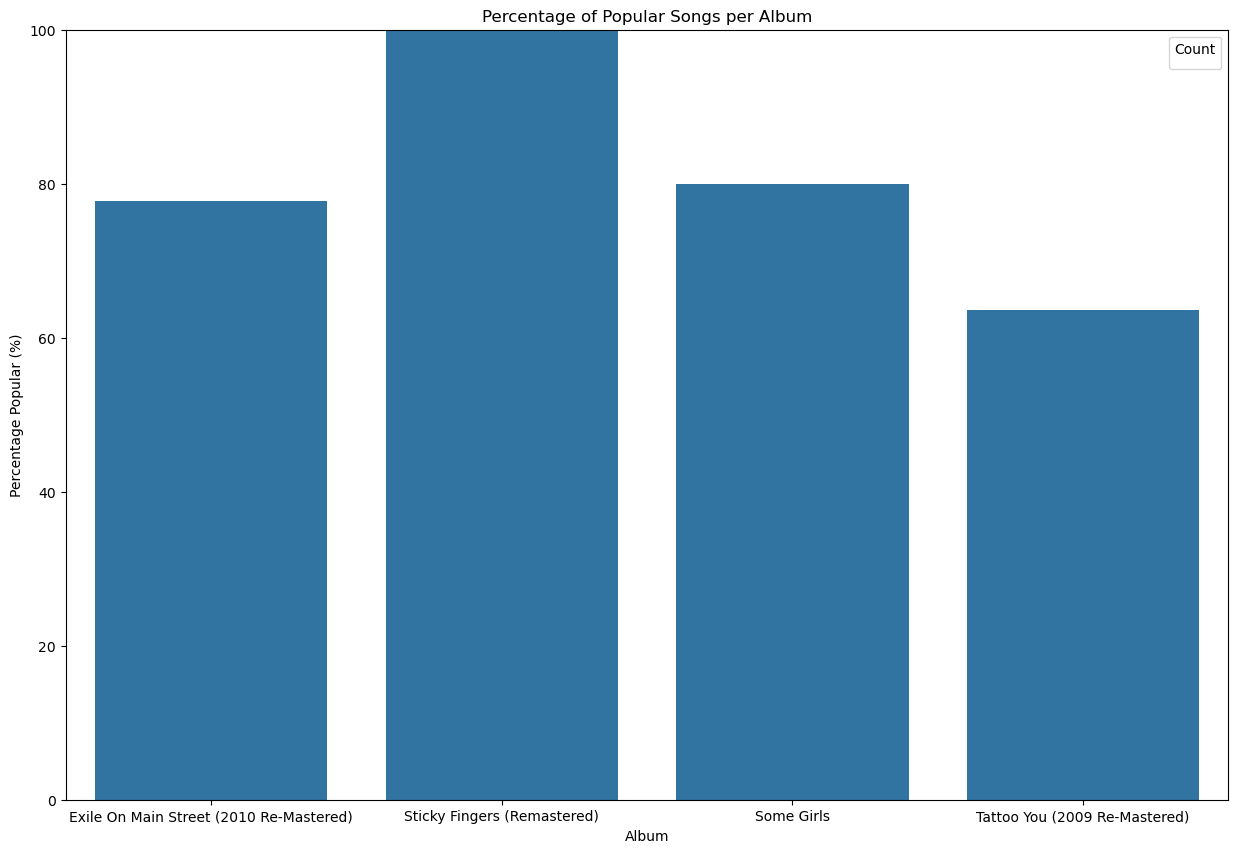

In [198]:
# Plot a bar graph using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(
    data=album_popular_counts,
    x="album",
    y="Percentage_Popular" # Recommended albums in green
)
plt.title("Percentage of Popular Songs per Album")
plt.xlabel("Album")
plt.ylabel("Percentage Popular (%)")
plt.ylim(0, 100)  # Set the y-limit from 0 to 100
plt.legend(title="Count")
plt.show()

In [199]:
# a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album
# Popular albums are Exile On Main Street (2010 Re-Mastered) & Sticky Fingers (Remastered)

# b.	Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns
# c.    Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved


Dataset Shape: (1610, 18)
Columns: ['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

Data Types:
Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

Missing Values:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability 

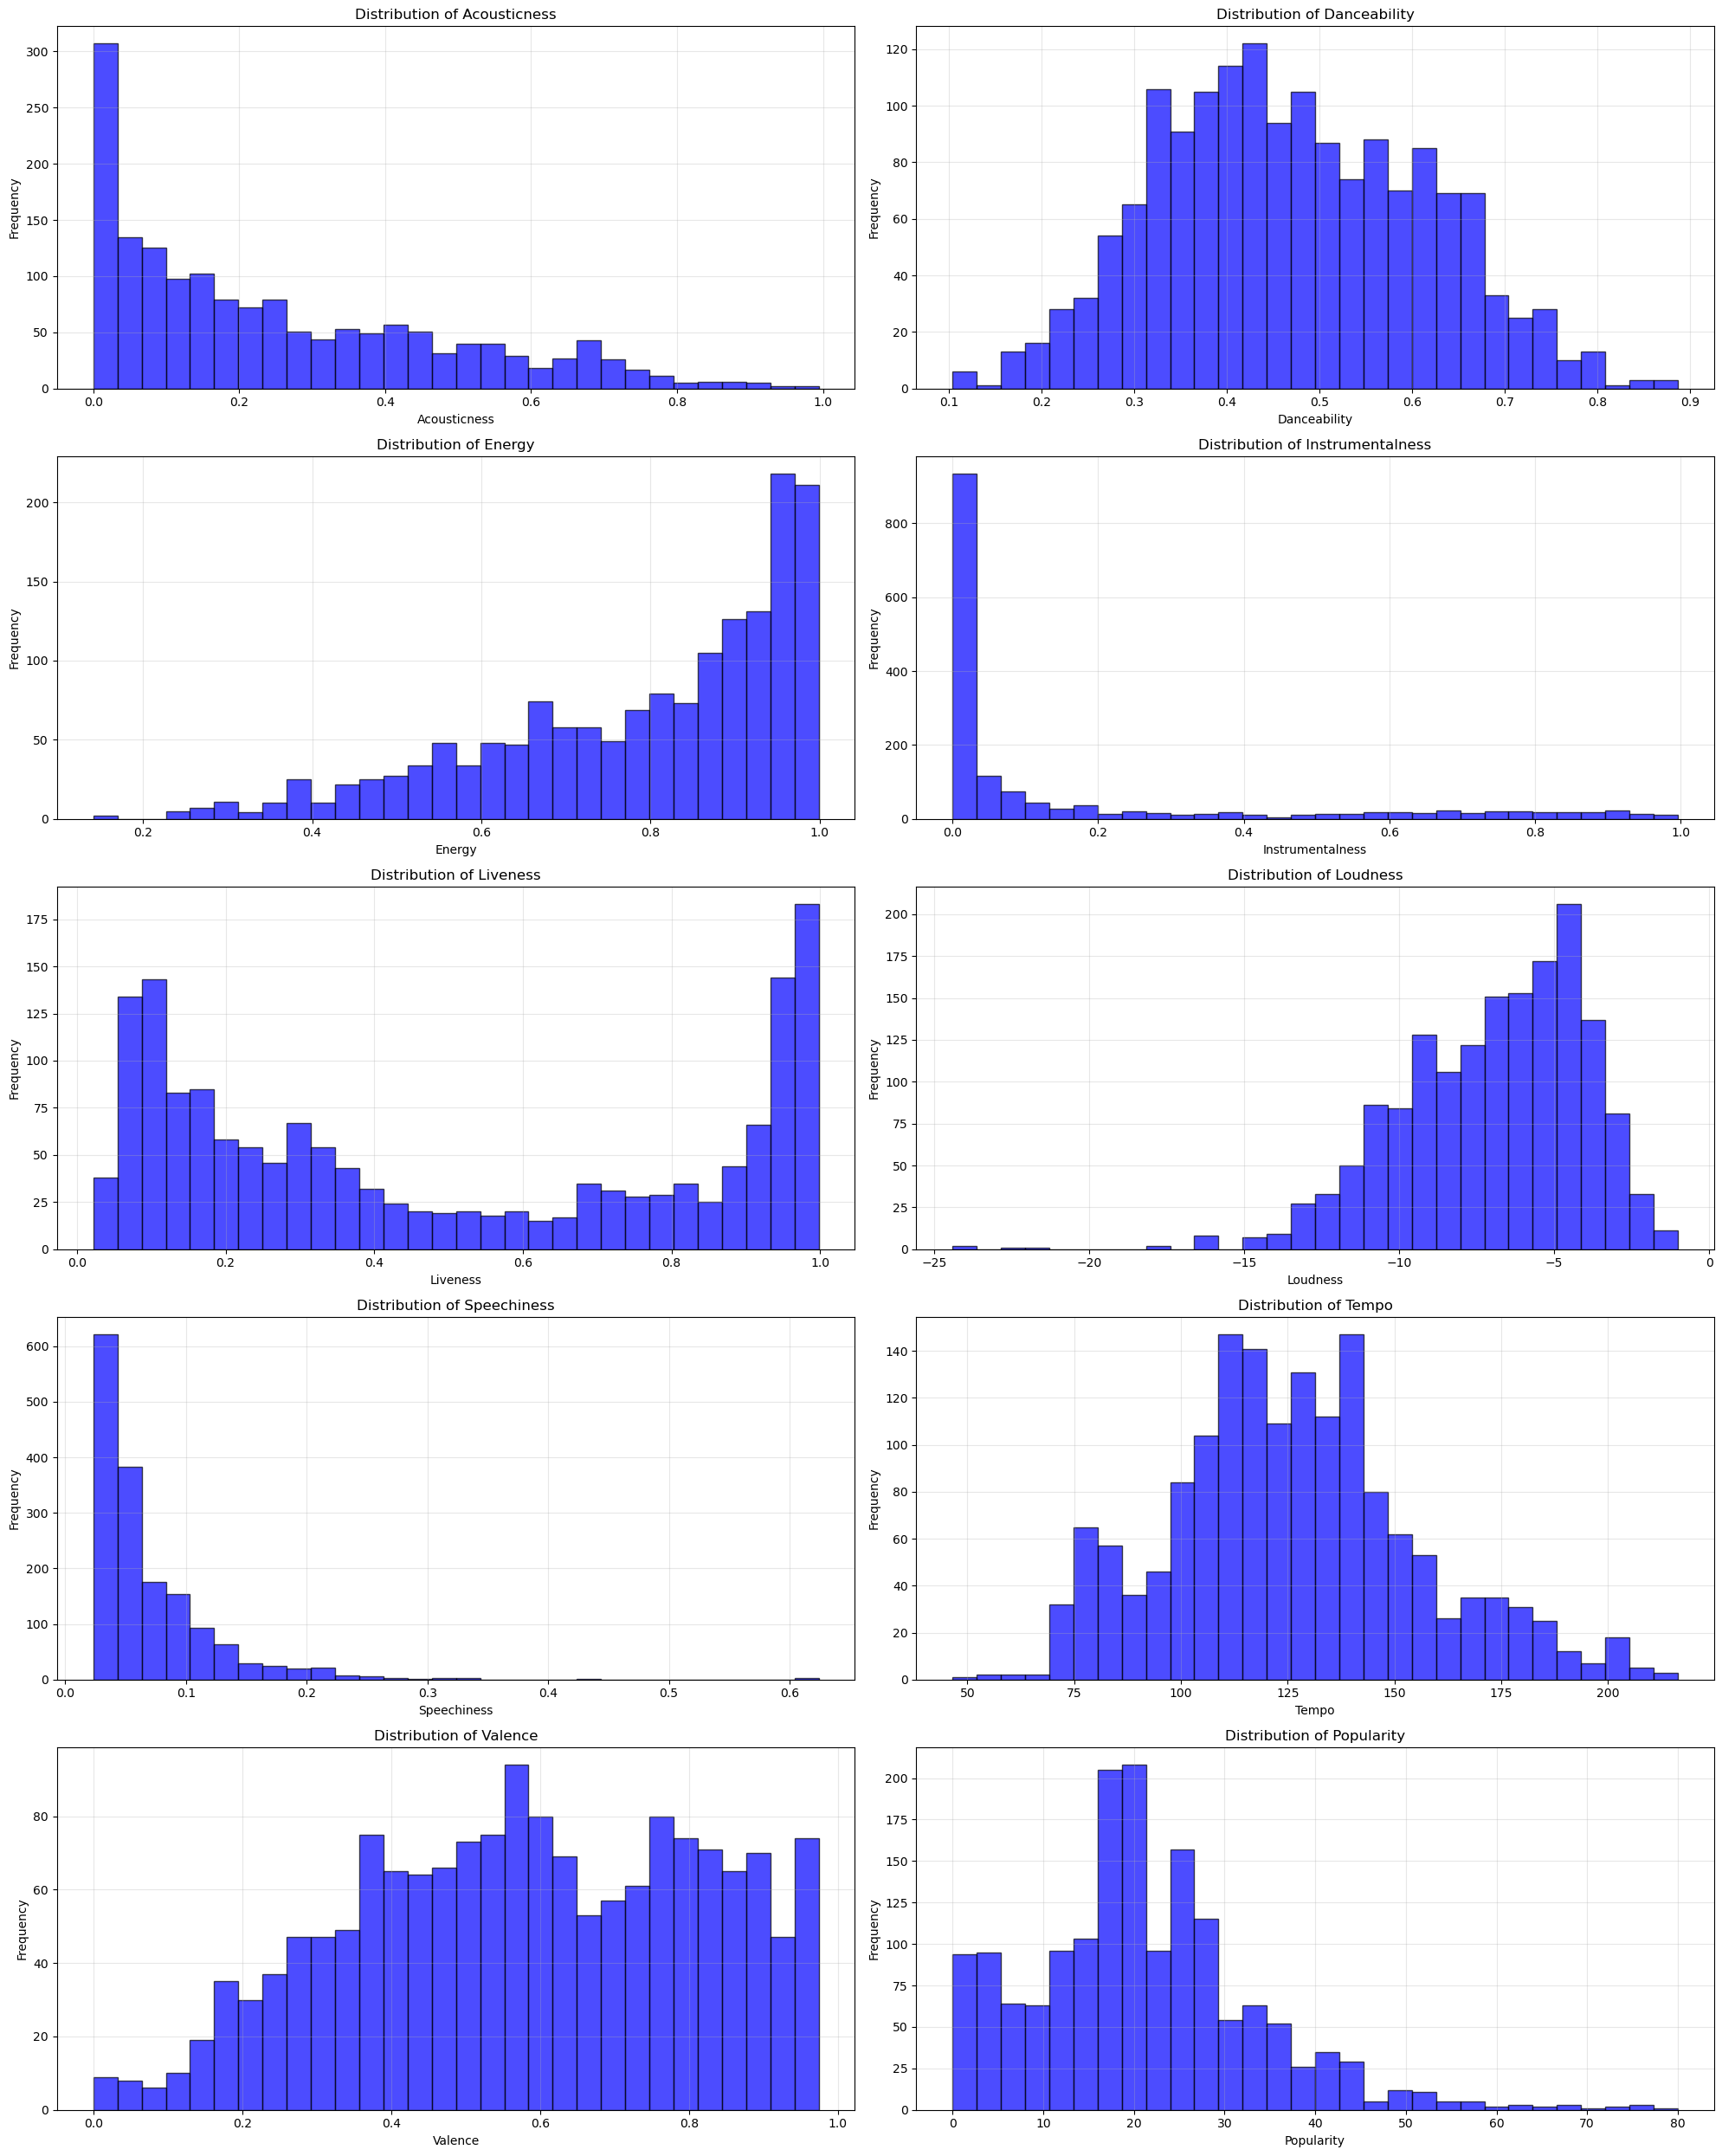


=== CORRELATION ANALYSIS ===


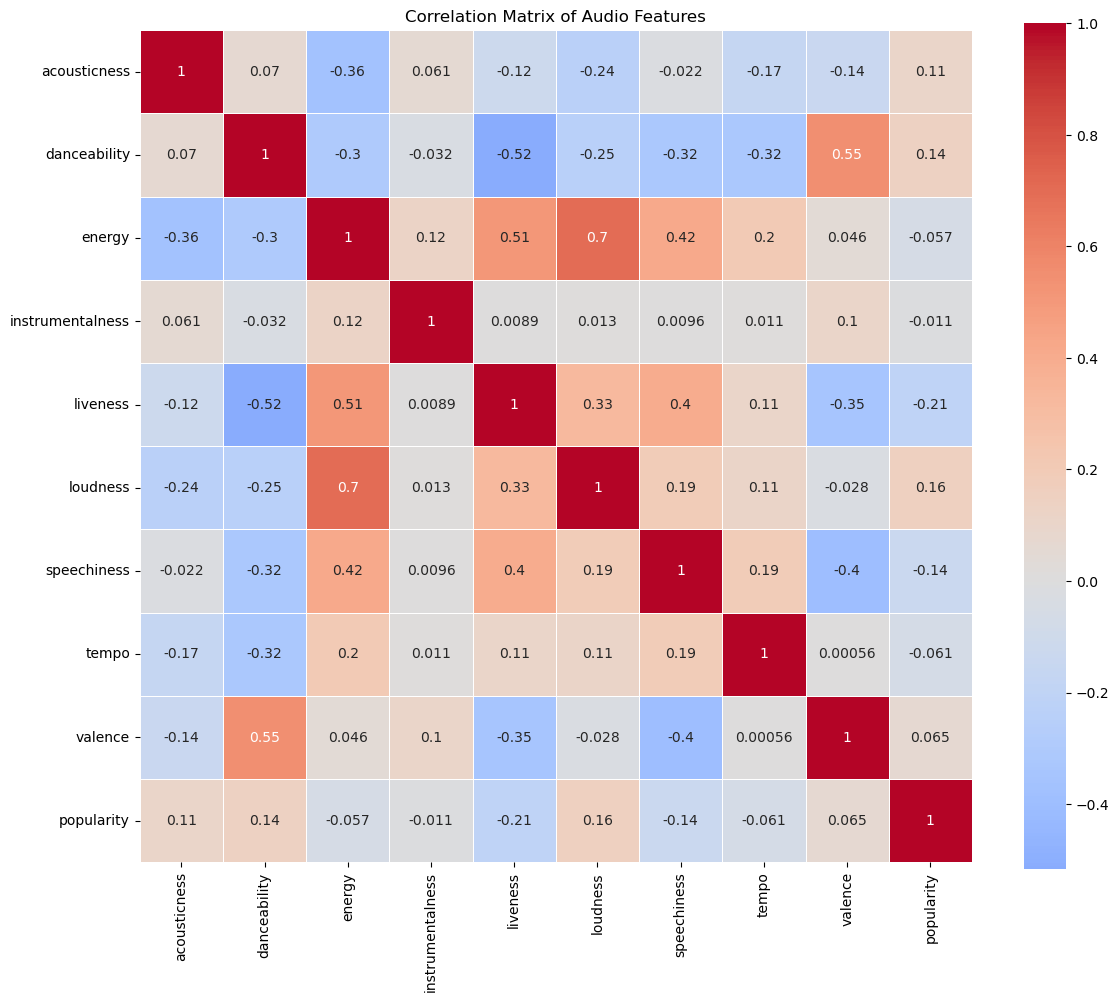

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('rolling_stones_spotify.csv')

# Basic data overview
print(f"\nDataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData Types:")
print(df.dtypes)

# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

# Basic statistics for audio features
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

print(f"\n=== BASIC STATISTICS FOR AUDIO FEATURES ===")
print(df[audio_features].describe())

# Set up plotting style
plt.style.use('default')
fig = plt.figure(figsize=(20, 25))

# 1. Distribution of Audio Features
print("\n=== ANALYZING FEATURE DISTRIBUTIONS ===")
for i, feature in enumerate(audio_features, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[feature], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Correlation Matrix
print("\n=== CORRELATION ANALYSIS ===")
correlation_matrix = df[audio_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()



In [201]:
print("Strongest Positive Correlations:")
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlations = upper_tri.stack().sort_values(ascending=False)
print(correlations.head(10))

print("\nStrongest Negative Correlations:")
print(correlations.tail(10))

Strongest Positive Correlations:
energy        loudness       0.698039
danceability  valence        0.546210
energy        liveness       0.511188
              speechiness    0.417214
liveness      speechiness    0.400018
              loudness       0.327036
energy        tempo          0.201885
speechiness   tempo          0.192687
loudness      speechiness    0.189904
              popularity     0.156323
dtype: float64

Strongest Negative Correlations:
liveness      popularity    -0.205845
acousticness  loudness      -0.237083
danceability  loudness      -0.249406
              energy        -0.300536
              speechiness   -0.322684
              tempo         -0.324398
liveness      valence       -0.347451
acousticness  energy        -0.363819
speechiness   valence       -0.399751
danceability  liveness      -0.516387
dtype: float64


In [202]:
print(f"Most Popular Songs:")
top_popular = df.nlargest(10, 'popularity')[['name', 'album', 'year', 'popularity']]
print(top_popular)


Most Popular Songs:
                                                   name  \
1403                                    Paint It, Black   
862                       Start Me Up - Remastered 2009   
1248                                      Gimme Shelter   
1472       (I Can't Get No) Satisfaction - Mono Version   
1257  Sympathy For The Devil - 50th Anniversary Edition   
901                   Beast Of Burden - Remastered 1994   
1023                                              Angie   
893                               Miss You - Remastered   
1122                             Wild Horses - 2009 Mix   
1256                 You Can't Always Get What You Want   

                                           album  year  popularity  
1403                                   Aftermath  1966          80  
862                Tattoo You (2009 Re-Mastered)  1981          76  
1248                                Let It Bleed  1969          76  
1472                            Out Of Our Heads  1965

In [203]:
print(f"\nLeast Popular Songs:")
least_popular = df.nsmallest(10, 'popularity')[['name', 'album', 'year', 'popularity']]
print(least_popular)


Least Popular Songs:
                                                   name  \
272   Beast Of Burden - Live At Arrowhead Stadium, K...   
546                                   Show Intro - Live   
587                         Next Time You See Me - Live   
739                            Continental Drift - Live   
1338                                       All Sold Out   
1394                               Not Fade Away - Live   
1396                              Fortune Teller - Live   
1397                               The Last Time - Live   
1400                                 I'm Alright - Live   
1401  Have You Seen Your Mother, Baby, Standing In T...   

                                                  album  year  popularity  
272                                       Honk (Deluxe)  2019           0  
546   Live 1965: Music From Charlie Is My Darling (L...  2012           0  
587                     Live At The Checkerboard Lounge  2012           0  
739                     

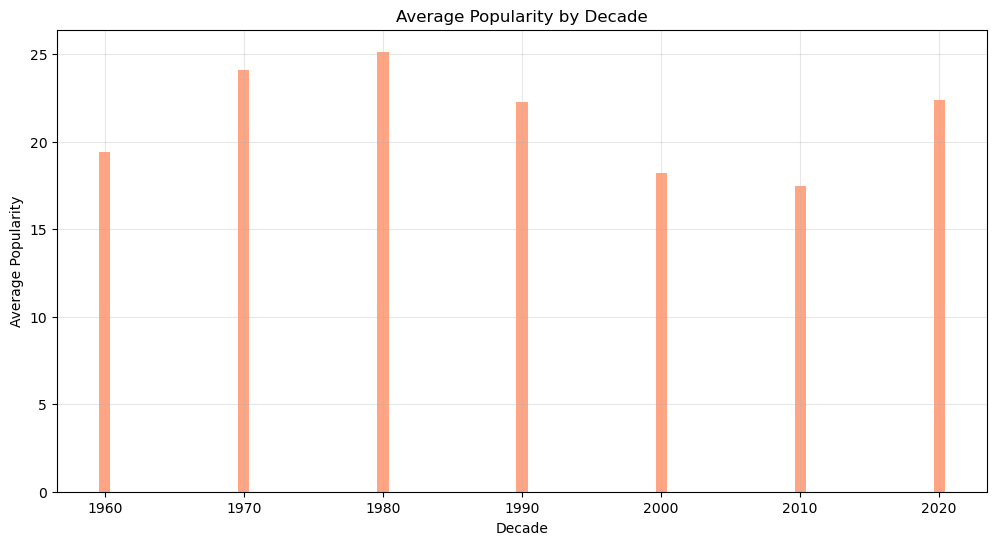


=== ALBUM ANALYSIS ===
Top 15 Albums by Average Popularity:
                                                    avg_popularity  \
album                                                                
Sticky Fingers (Remastered)                                  53.30   
Some Girls                                                   48.10   
Tattoo You (2009 Re-Mastered)                                46.45   
Exile On Main Street (2010 Re-Mastered)                      44.17   
Beggars Banquet (50th Anniversary Edition)                   43.70   
Aftermath                                                    43.09   
Goats Head Soup (Remastered 2009)                            40.30   
Out Of Our Heads                                             39.58   
Black And Blue (Remastered 2009)                             38.50   
Let It Bleed (50th Anniversary Edition / Remast...           38.33   
Emotional Rescue (2009 Re-Mastered)                          35.50   
Blue & Lonesome              

In [204]:
# Popularity distribution by decade
df['decade'] = (df['year'] // 10) * 10
decade_popularity = df.groupby('decade')['popularity'].mean()

plt.figure(figsize=(12, 6))
plt.bar(decade_popularity.index, decade_popularity.values, alpha=0.7, color='coral')
plt.title('Average Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Popularity')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Album Analysis
print("\n=== ALBUM ANALYSIS ===")
album_stats = df.groupby('album').agg({
    'popularity': 'mean',
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean',
    'name': 'count'
}).round(2)
album_stats.columns = ['avg_popularity', 'avg_energy', 'avg_danceability', 'avg_valence', 'track_count']
album_stats = album_stats.sort_values('avg_popularity', ascending=False)

print("Top 15 Albums by Average Popularity:")
print(album_stats.head(15))

# d.	Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [205]:
from sklearn.decomposition import PCA
# Select audio features for PCA
audio_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

# Create feature matrix
x = df[audio_features].copy()
y=df.popularity
pc=PCA(n_components=9)
x.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060


In [206]:
y

0       33
1       34
2       34
3       32
4       32
        ..
1605    39
1606    36
1607    30
1608    27
1609    35
Name: popularity, Length: 1610, dtype: int64

In [207]:
from sklearn.model_selection import train_test_split
x, xt, y, yt = train_test_split(
    x, 
    y, 
    test_size=.10, 
    random_state=42
)
y

1603    32
297     16
1132    32
1343    22
1388    12
        ..
1130    36
1294    25
860     24
1459     1
1126    43
Name: popularity, Length: 1449, dtype: int64

In [208]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_tr_sc = mms.fit_transform(x)
pd.DataFrame(x_tr_sc).head()

,0,1,2,3,4,5,6,7,8
0,0.014679,0.482759,0.673660,0.130522,0.136359,0.667436,0.054261,0.242774,0.933265
1,0.154922,0.443167,0.878788,0.011145,0.982584,0.698470,0.211052,0.396462,0.363450
2,0.691144,0.418902,0.289044,0.010743,0.058293,0.764769,0.003828,0.547659,0.162218
3,0.684102,0.581098,0.757576,0.000000,0.308472,0.712918,0.044274,0.555440,0.566735
4,0.019307,0.389527,0.956876,0.081727,0.937506,0.710610,0.072736,0.429712,0.415811


In [209]:
x_test_sc=mms.transform(xt)

In [210]:
x_tr_pca=pc.fit_transform(x_tr_sc)

In [211]:
x_tr_pca

array([[-0.41611847,  0.10520752, -0.26993428, ..., -0.21671806,
        -0.10559211,  0.06992873],
       [ 0.53521151, -0.18424609, -0.02300232, ...,  0.11528481,
        -0.09619673,  0.02005574],
       [-0.41654277, -0.51862222,  0.50987125, ...,  0.0216081 ,
         0.21439803,  0.00966649],
       ...,
       [-0.40988482, -0.41622601,  0.35948999, ...,  0.16909429,
         0.15684308,  0.01820629],
       [ 0.07957008,  0.65926509,  0.24254043, ..., -0.14707372,
        -0.10818441, -0.00287538],
       [-0.37458221, -0.45439313,  0.36636757, ..., -0.02226916,
         0.24186427,  0.06714162]])

In [212]:
variance=pc.explained_variance_ratio_
variance
cum_var=variance.cumsum().round(decimals=4)*100
cum_var

array([ 38.49,  56.75,  72.92,  82.42,  89.08,  94.75,  97.51,  99.18,
       100.  ])

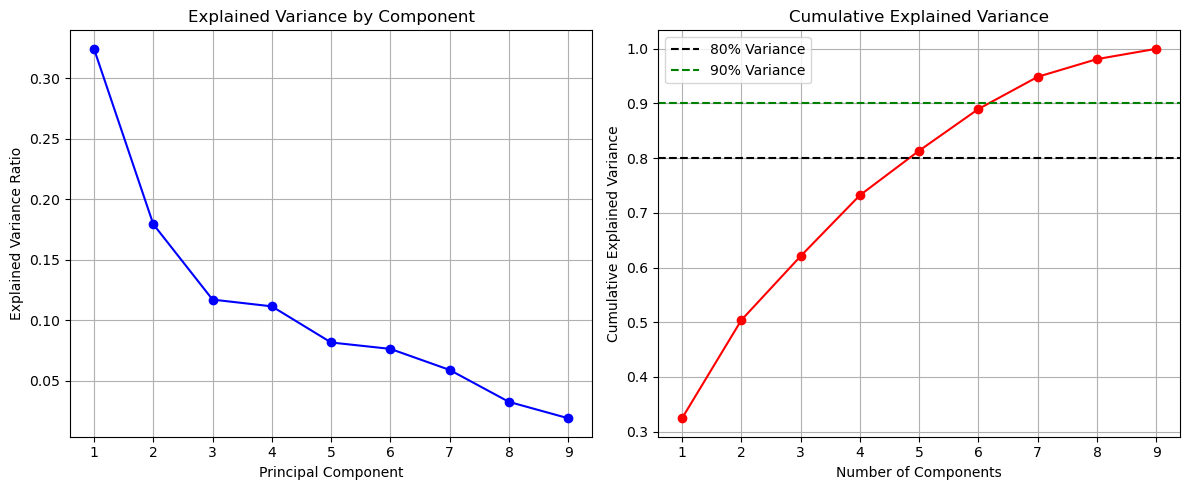

Components needed for 80% variance: 5
Components needed for 90% variance: 7
Total original features: 9

Feature loadings for first 4 components:
                    PC1    PC2    PC3    PC4
acousticness     -0.178 -0.448  0.401 -0.058
danceability     -0.418  0.301  0.056 -0.223
energy            0.452  0.386  0.137 -0.142
instrumentalness  0.023  0.120  0.835  0.402
liveness          0.444 -0.111  0.086 -0.182
loudness          0.370  0.357  0.074 -0.290
speechiness       0.375 -0.205  0.081 -0.019
tempo             0.219  0.077 -0.311  0.797
valence          -0.258  0.598  0.057  0.110


In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Prepare data for PCA
features_for_clustering = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

plt.subplot(1, 2, 2)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum) + 1), cumsum, 'ro-')
plt.axhline(y=0.8, color='k', linestyle='--', label='80% Variance')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print insights
n_components_80 = np.argmax(cumsum >= 0.8) + 1
n_components_90 = np.argmax(cumsum >= 0.9) + 1

print(f"Components needed for 80% variance: {n_components_80}")
print(f"Components needed for 90% variance: {n_components_90}")
print(f"Total original features: {len(features_for_clustering)}")

# Show feature loadings for first few components
components_df = pd.DataFrame(
    pca.components_[:4].T,
    columns=[f'PC{i+1}' for i in range(4)],
    index=features_for_clustering
)
print("\nFeature loadings for first 4 components:")
print(components_df.round(3))

In [240]:
n_components_90

7

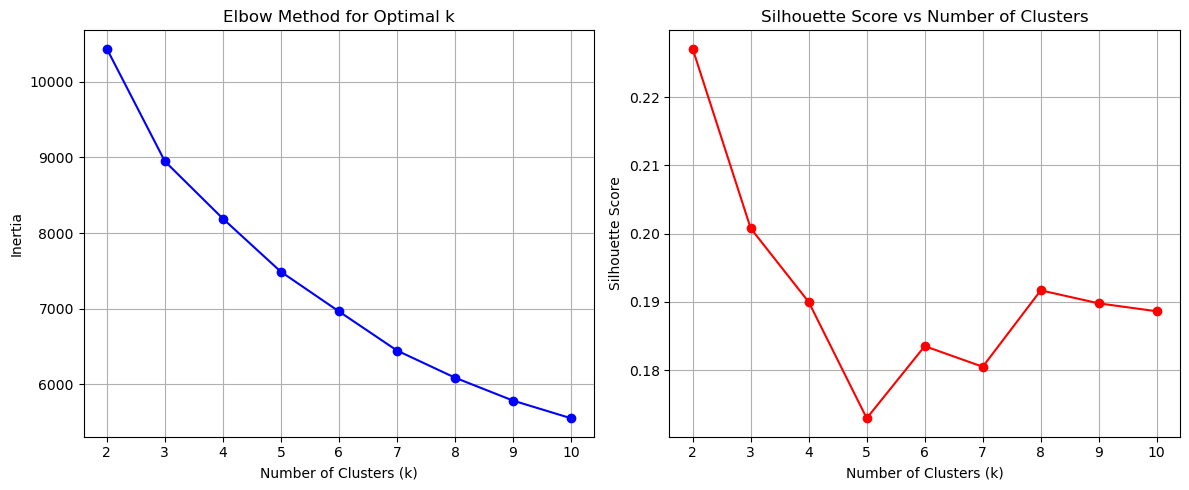

Optimal number of clusters based on silhouette score: 2
Maximum silhouette score: 0.227


In [233]:
# Use optimal number of PCA components (for 90% variance)
pca_optimal = PCA(n_components=n_components_90)
features_pca = pca_optimal.fit_transform(scaled_features)

# Elbow method and silhouette analysis
k_range = range(2, 11)
inertias = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_pca, kmeans.labels_))

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Maximum silhouette score: {max(silhouette_scores):.3f}")

In [235]:
optimal_k

2

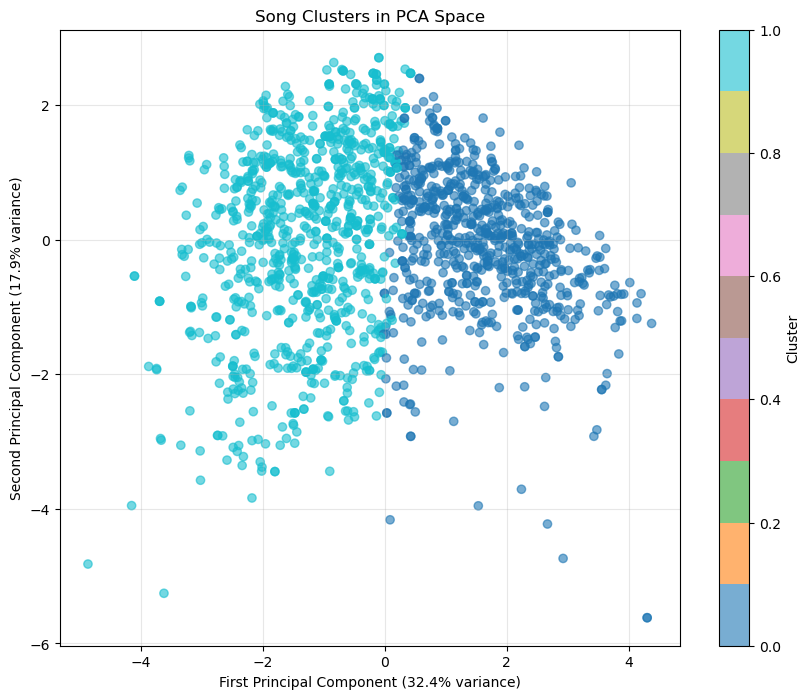

Cluster distribution:
cluster
0    712
1    898
Name: count, dtype: int64


In [242]:
# Apply K-means with optimal number of clusters
#optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
optimal_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = optimal_kmeans.fit_predict(features_pca)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Visualize clusters in 2D (first two principal components)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], 
                     c=cluster_labels, cmap='tab10', alpha=0.6)
plt.xlabel(f'First Principal Component ({pca_optimal.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca_optimal.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Song Clusters in PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Cluster distribution:")
print(df['cluster'].value_counts().sort_index())

In [237]:
df['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
1605    1
1606    1
1607    1
1608    1
1609    1
Name: cluster, Length: 1610, dtype: int32

In [ ]:
# Analyze cluster characteristics K-Mean
cluster_summary = df.groupby('cluster')[features_for_clustering + ['popularity']].mean()


In [ ]:
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
cluster,,,,,,,,,,
0,0.189699,0.371278,0.915615,0.158897,0.789764,-5.450917,0.097961,135.608045,0.483153,18.189607
1,0.298662,0.546229,0.694620,0.168351,0.255426,-8.177335,0.046956,118.529115,0.660669,22.848552


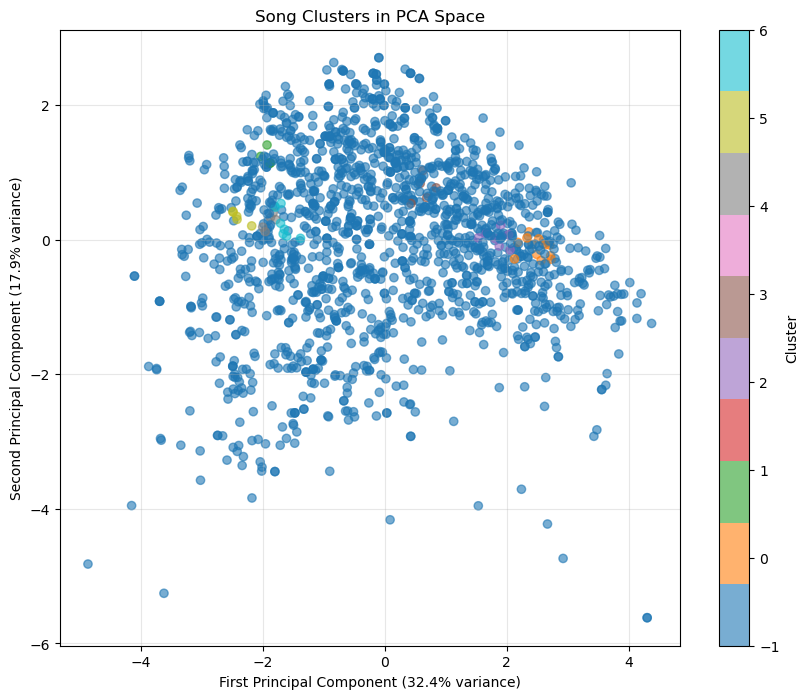

Cluster distribution:
cluster_dbs
-1    1564
 0      12
 1       5
 2       7
 3       5
 4       5
 5       5
 6       7
Name: count, dtype: int64


In [ ]:
# Analyze cluster characteristics DBScan
dbs = DBSCAN()
cluster_labels_dbs = dbs.fit_predict(features_pca)
df['cluster_dbs'] = cluster_labels_dbs
# Visualize clusters in 2D (first two principal components)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], 
                     c=cluster_labels_dbs, cmap='tab10', alpha=0.6)
plt.xlabel(f'First Principal Component ({pca_optimal.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca_optimal.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Song Clusters in PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Cluster distribution:")
print(df['cluster_dbs'].value_counts().sort_index())

In [255]:
cluster_summary_dbs = df.groupby('cluster_dbs')[features_for_clustering + ['popularity']].mean()
cluster_summary_dbs

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
cluster_dbs,,,,,,,,,,
-1,0.252306,0.467421,0.791603,0.168744,0.489262,-6.990636,0.069530,126.275393,0.581714,20.819693
0,0.026386,0.371333,0.971750,0.015118,0.931917,-4.450500,0.121667,133.227917,0.332083,17.000000
1,0.415000,0.775800,0.709200,0.015720,0.257780,-4.686800,0.039000,109.545200,0.855800,42.800000
2,0.023664,0.395000,0.960143,0.000176,0.938000,-5.529286,0.096414,113.247143,0.411429,16.571429
3,0.083860,0.509800,0.903200,0.010237,0.962600,-6.572200,0.053660,116.759000,0.674800,14.400000
4,0.436400,0.582000,0.683400,0.001466,0.221000,-8.132400,0.028840,116.090400,0.820600,26.800000
5,0.415600,0.701600,0.657400,0.010650,0.134320,-9.010400,0.037420,118.446200,0.794800,12.200000
6,0.203000,0.535857,0.638857,0.003617,0.121643,-8.118000,0.034286,114.527000,0.698571,15.142857
